
# <center>__League of Legends Win Ratio Depending on the Game’s Various Factors__

#### <center> Yong Hun Na, Dongjun Kim, Ji Heon Kim
    
***

<center><img src="https://user-images.githubusercontent.com/98725674/168486742-270c2455-9812-4bdc-90f3-921c16e68cd8.JPG"/></center>

***



# <center>__Introduction and Motivation__

League of Legends is a team-based strategy multiplayer game officially released in 2009. It has been, and still is, one of the world's most popular and successful video games of recent decades. Each game in League of Legends begins with ten players, separated by two teams of five players each; it is one team of the two that will win. It has multiple major factors that affect the win ratio in the game which makes each game unpredictable as a player. However, we, as data analysts, can predict the general win ratio based on certain game features that affect how a game will be driven and the chance for which team will win that game, using related datasets. Further explanation is written in the Gathering Data section of this tutorial.

There are a lot of useful datasets published containing these factors due to the popularity of the game; we will use two of these datasets to define the relationship between the win ratio and the following factors of the game: wards, gold earned, wards destroyed, first blood, kills, deaths, assists, dragons, heralds, towers destroyed, total experience, total minions killed. What these factors mean and how they affect the game is further explained in the Gathering Data section for those who are not familiar with MOBA (multiplayer online battle arena) video games.

This tutorial will analyze and experiment with the chosen datasets to provide useful pieces of information about how the win ratio varies depending on these factors in League of Legends.

*** 


# <center>__Gathering Data__

I originally applied for an app using the Riot Developer Portal, and after it was approved, I looked at the APIs tab to see what kind of data I could request. The site offers free, well-organized data, making data collection much easier! There were a lot of League of Legend related datasets. However, I chose the one with the greatest data and interesting qualities to investigate. This dataset represents Games with a 10k ranking (from high Diamond to low Master). Each row has its own game, with features collected after the first 10 minutes of play. Each column has elements related to winning the game.
 
The data frame contained the following content:
- Win: the result of a game (1 is considered a win and 0 as a defeat).
- Ward Placed: the number of uses of an item called Ward for the game map vision
- Total Gold: total amount of money earned in the game
- Wards Destroyed: The number of destring of the item, Ward
- First Blood: the first time you kill an enemy (significant amount of gold in the beginning of the game)
- Kills: the number of times the enemy was killed (each kill gives a lot of gold, but less than First Blood)
- Assists: the number of times you helped ally(allies) kill the enemy (each assist gives for a less significant amount of gold)
- Dragons: whether or not a team has caught the dragon
- Heralds: whether or not a team has caught the Heralds
- Towers Destroyed: whether or not a team broke the enemy tower
- Total Experience: the total team’s experience during the game (gives more strength for players)
- Total Minions Killed: the number of minions eliminated by the team in the game for a small amount of gold
***    

# <center>__Setup__
## <center>Starting with Data

 Python 3 is used, as well as a few imported libraries such as pandas, numpy, seaborn, matplotlib,seaborn and more.


In [1]:
# Import our necessary packages
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


***
# <center>__Loading the Data__
Make sure the csv file is in the same directory as your Python code after obtaining it from the Riot Developer Portal. We'll use Pandas' read csv() function to quickly and easily convert all of the data into a dataframe variable.

If everything goes well, you should get something like this after returning the data frame.


In [2]:
# read files
lol_data = pd.read_csv("high_diamond_ranked_10min.csv")
lol_data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


***
# <center>__Data tidying__

As we can see, there is an index column that will not be used in this tutorial. If we ever need to use the index, Pandas will have already preserved it when the dataframe is created. We made a new data frame lol_data_tidy and brought the columns we needed. 


In [3]:
lol_data_tidy = lol_data[["blueWins", "blueWardsPlaced", "blueTotalGold", "blueWardsDestroyed", "blueFirstBlood", "blueKills", "blueAssists", "blueDragons", "blueHeralds", "blueTowersDestroyed", "blueTotalExperience", "blueTotalMinionsKilled"]]

names = ["Win", "WardPlaced","TotalGold", "WardsDestroyed", "FirstBlood", "Kills", "Assists", "Dragons", "Heralds", "TowersDestroyed", "TotalExperience", "TotalMinionsKilled"]

lol_data_tidy.columns = names
lol_data_tidy

,Win,WardPlaced,TotalGold,WardsDestroyed,FirstBlood,Kills,Assists,Dragons,Heralds,TowersDestroyed,TotalExperience,TotalMinionsKilled
0,0,28,17210,2,1,9,11,0,0,0,17039,195
1,0,12,14712,1,0,5,5,0,0,0,16265,174
2,0,15,16113,0,0,7,4,1,0,0,16221,186
3,0,43,15157,1,0,4,5,0,1,0,17954,201
4,0,75,16400,4,0,6,6,0,0,0,18543,210
...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,17765,2,1,7,5,1,0,0,18967,211
9875,1,54,16238,0,0,6,8,1,0,0,19255,233
9876,0,23,15903,1,0,6,5,0,0,0,18032,210
9877,0,14,14459,4,1,2,3,1,0,0,17229,224


In [4]:
# Computing a summary of statistics pertanining to the lol_data_tidy.
lol_data_tidy.describe()


,Win,WardPlaced,TotalGold,WardsDestroyed,FirstBlood,Kills,Assists,Dragons,Heralds,TowersDestroyed,TotalExperience,TotalMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,16503.455512,2.824881,0.504808,6.183925,6.645106,0.361980,0.187974,0.051422,17928.110133,216.699565
std,0.500024,18.019177,1535.446636,2.174998,0.500002,3.011028,4.064520,0.480597,0.390712,0.244369,1200.523764,21.858437
min,0.000000,5.000000,10730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10098.000000,90.000000
25%,0.000000,14.000000,15415.500000,1.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,17168.000000,202.000000
50%,0.000000,16.000000,16398.000000,3.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,17951.000000,218.000000
75%,1.000000,20.000000,17459.000000,4.000000,1.000000,8.000000,9.000000,1.000000,0.000000,0.000000,18724.000000,232.000000
max,1.000000,250.000000,23701.000000,27.000000,1.000000,22.000000,29.000000,1.000000,1.000000,4.000000,22224.000000,283.000000


In [5]:
# Divide in win acse and lose case.
lol_win = lol_data_tidy[(lol_data_tidy["Win"] == 1)]
lol_lose= lol_data_tidy[(lol_data_tidy["Win"] == 0)]

In [6]:
# The detail of Win
lol_win.describe()

,Win,WardPlaced,TotalGold,WardsDestroyed,FirstBlood,Kills,Assists,Dragons,Heralds,TowersDestroyed,TotalExperience,TotalMinionsKilled
count,4930.0,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,1.0,22.289858,17145.263895,2.921298,0.605882,7.201623,7.771805,0.464909,0.224138,0.079716,18404.577890,221.624949
std,0.0,17.597520,1483.316909,2.160410,0.488710,3.040859,4.219824,0.498818,0.417056,0.308029,1075.294035,20.741340
min,1.0,5.000000,12939.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14181.000000,143.000000
25%,1.0,15.000000,16103.000000,2.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,17700.000000,208.000000
50%,1.0,17.000000,17029.500000,3.000000,1.000000,7.000000,7.000000,0.000000,0.000000,0.000000,18407.500000,222.500000
75%,1.0,20.000000,18049.500000,4.000000,1.000000,9.000000,10.000000,1.000000,0.000000,0.000000,19145.000000,236.000000
max,1.0,250.000000,23701.000000,24.000000,1.000000,22.000000,29.000000,1.000000,1.000000,4.000000,22125.000000,283.000000


In [7]:
# The detail of lose
lol_lose.describe()


,Win,WardPlaced,TotalGold,WardsDestroyed,FirstBlood,Kills,Assists,Dragons,Heralds,TowersDestroyed,TotalExperience,TotalMinionsKilled
count,4949.0,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.00000
mean,0.0,22.286725,15864.111134,2.728834,0.404122,5.170135,5.522732,0.259446,0.151950,0.023237,17453.471610,211.79309
std,0.0,18.431405,1302.141518,2.185427,0.490771,2.613114,3.566118,0.438375,0.359009,0.152006,1128.685669,21.84133
min,0.0,5.000000,10730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10098.000000,90.00000
25%,0.0,14.000000,14961.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,16730.000000,198.00000
50%,0.0,16.000000,15791.000000,2.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,17511.000000,213.00000
75%,0.0,20.000000,16706.000000,4.000000,1.000000,7.000000,8.000000,1.000000,0.000000,0.000000,18228.000000,227.00000
max,0.0,221.000000,21055.000000,27.000000,1.000000,16.000000,26.000000,1.000000,1.000000,2.000000,22224.000000,272.00000


***
## <center>__Heat Map for Exploratory Data Analysis__

We'll now conduct our exploratory data analysis. First, we'll look at the percentage of games won by teams with Ward Placed, Total Gold, Wards Destroyed, First Blood, Kills, Assists, Dragons, Heralds, Towers Destroyed, Total Experience, Total Minions Killed." The association between all of the columns will then be visualized.

<AxesSubplot:>

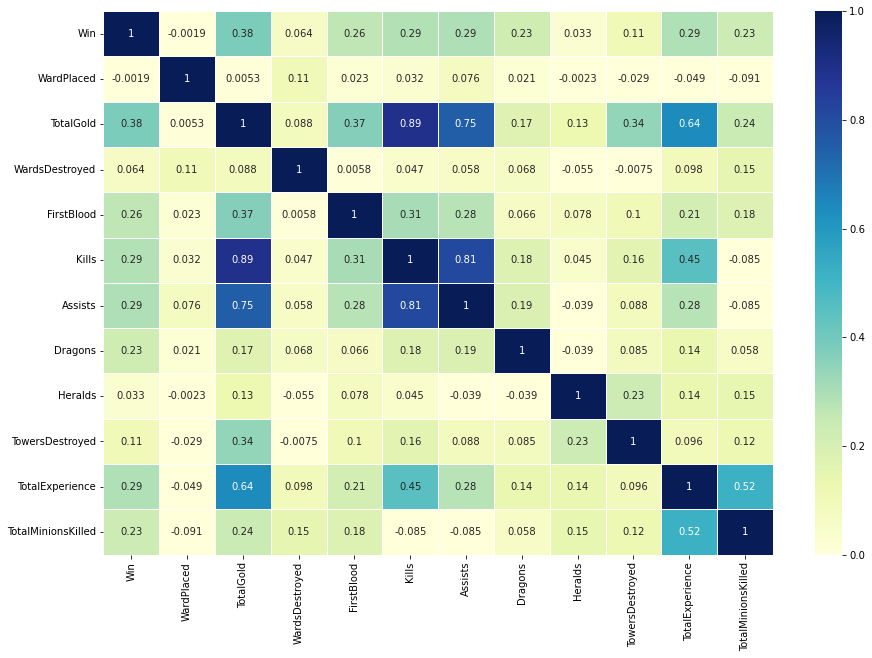

In [8]:

plt.figure(figsize = (15,10))

sample_data = lol_data_tidy.sample(n=500, random_state=3)
sns.heatmap(sample_data.corr(), vmin = 0, annot = True, cmap = "YlGnBu", lw = .5, linecolor = 'white')

It's critical to remember the following before reading this heatmap:
- Every square shows the correlation between the audio features.
- The correlation ranges will be from -1 to 1.
- Closer values to 0 indicate that the two columns do not have a linear connection. It will show more green on our heatmap.
- The correlation is more favorably connected when the value is closer to 1. This will have a more Indigo color.
- Closer values to -1 indicate that the values of one column are decreasing while the features of the other column are increasing. This will make it appear yellower.
- Because the diagonal values with 1 are essentially columns correlating to themselves, it's fine to ignore them.

Looking at this heatmap closely, we can notice that there is an interesting association between the columns.
- TotalGold and Kills have the highest correlation of 0.89 compared to their neighboring columns
- TotalMinionsKilled and TowersDestroyed have the lowest value among the -1 to 1 range with -0.099 which is apparent from its yello color.
- WardDestroyed WardPlaced have the value of 0.11. This is the value that is closest to 0, indicating that there is little to no association. This is shown in green. 


***
## <center>__Data Analysis Using Histogram and Boxplot__

Text(0.5, 1.0, 'Kill Difference Boxplot')

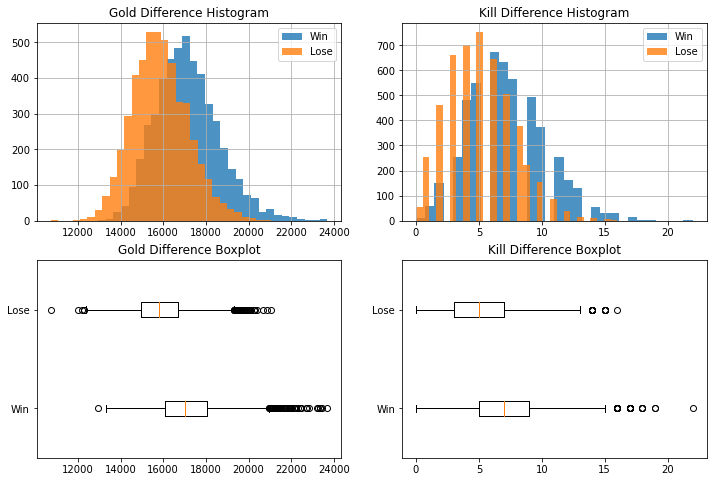

In [9]:
plt.figure(figsize=(12, 8))

# Making Gold Difference Histogram.
# x axis: gold, y axis: the number of wins or defeats
ax1 = plt.subplot(2,2,1)
# Total gold for winner
ax1.hist(lol_win["TotalGold"], bins=30, alpha = 0.8, label="Win")
# Total gold for loser 
ax1.hist(lol_lose["TotalGold"], bins=30, alpha = 0.8, label="Lose")
plt.title("Gold Difference Histogram")
ax1.grid()
ax1.legend()

# Making Kill Difference histogram
# x axis: the number of kill, y axis: the number of wins or defeats
ax2 = plt.subplot(2,2,2)
# Kills value for Winner
ax2.hist(lol_win["Kills"], bins=30, alpha = 0.8, label="Win")
# Kills value for Loser
ax2.hist(lol_lose["Kills"], bins=30, alpha = 0.8, label="Lose")
plt.title("Kill Difference Histogram")
ax2.grid()
ax2.legend()

# Making boxplot for Gold Difference
# x axis: gold 
ax3 = plt.subplot(2,2,3)
ax3.boxplot([lol_win["TotalGold"], lol_lose["TotalGold"]], vert=False)
ax3.set_yticklabels(['Win', "Lose"])
plt.title("Gold Difference Boxplot")

# Making boxplot for Kill Difference
# x axis: the number of Kills
ax4 = plt.subplot(2,2,4)
ax4.boxplot([lol_win["Kills"], lol_lose["Kills"]], vert=False)
ax4.set_yticklabels(['Win', "Lose"])
plt.title("Kill Difference Boxplot")


In the Gold Difference histogram, we can see that Win cases have higher average and quartile values. However, we can see that even when teams have significant gold advantages, they still lose. The situation is the same in the Kill Difference histogram.




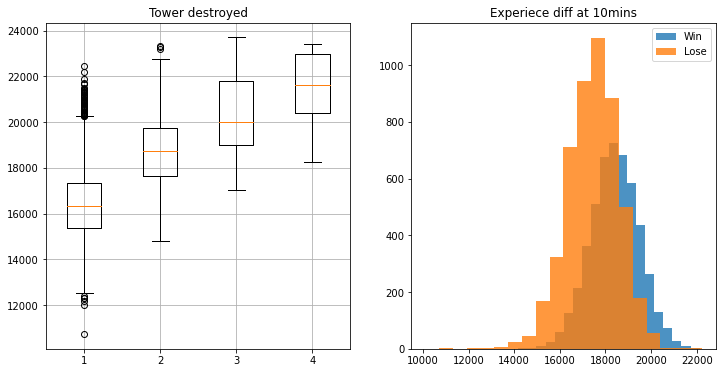

In [10]:
plt.figure(figsize=(12, 6))

# Making tower destroyed boxplot graph
# x axis: the number of tower destroyed, y axis: amount of gold you can get when you destroy the tower. 
ax2 = plt.subplot(1, 2, 1)
ax2.boxplot([lol_data_tidy[(lol_data_tidy["TowersDestroyed"] == 0)]["TotalGold"],
             lol_data_tidy[(lol_data_tidy["TowersDestroyed"] == 1)]["TotalGold"],
             lol_data_tidy[(lol_data_tidy["TowersDestroyed"] == 2)]["TotalGold"],
             lol_data_tidy[(lol_data_tidy["TowersDestroyed"] >= 3)]["TotalGold"]])
plt.title("Tower destroyed")
plt.grid()

# Making Experience Difference histogram
# x axis: Experience, y axis: win or defeats
ax2 = plt.subplot(1, 2, 2)
# Total Experience for Winner 
ax2.hist(lol_win["TotalExperience"], bins=20, alpha = 0.8, label="Win")
# Total Experiecne for Loser 
ax2.hist(lol_lose["TotalExperience"], bins=20, alpha = 0.8, label="Lose")
plt.title("Experiece diff at 10mins")
plt.legend()



We can observe that some columns have little effect on the victory rate, while others have a significant impact.
Overall the most influential aspects are:
- TotalExperience
- TotalGold
- Kills

By the visualize above we can see from the diagram that TowersDestroyed isn't extremely importan. we could think it's no relation with the winrate. We will look at their win rate and try to use linear regression to come up with a possible equation.



***
## <center>__Analysizing Data Correlation Using Principal Component Analysis__

We wanted to explore if the variance in the data could be explained by fewer variables than the eight components we'd be using to forecast the game's outcome. For this purpose, we ran a "Principal Component Analysis" to see how many features we could reduce our data to while still retaining the majority of the variance. We chose PCA to speed up the machine learning algorithm

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Use standard scaler to scale the data and fit it in the scaler
scaler = StandardScaler()
scaler.fit(lol_data_tidy.drop(['Win'], axis = 1))
# Scale the data using transfor to decimal points while dropping the win axies which we don't use here
scaled_data = scaler.transform(lol_data_tidy.drop(['Win'], axis = 1))
scaled_data

array([[ 0.31699566,  0.46017897, -0.37927514, ..., -0.21043903,
        -0.74063935, -0.992782  ],
       [-0.57099219, -1.16679157, -0.83906887, ..., -0.21043903,
        -1.38539058, -1.95355804],
       [-0.40449447, -0.25430729, -1.2988626 , ..., -0.21043903,
        -1.4220431 , -1.40454316],
       ...,
       [ 0.03949946, -0.39108224, -0.83906887, ..., -0.21043903,
         0.0865415 , -0.30651339],
       [-0.45999371, -1.33157281,  0.54031232, ..., -0.21043903,
        -0.58236708,  0.33400397],
       [-0.23799674, -0.15465697, -1.2988626 , ..., -0.21043903,
        -0.50572998, -0.44376711]])

In [12]:
variable_ratio = []

# Loop through components and add it up to append in the graph
for n in range(0,8):
    pca = PCA(n_components = n)
    pca.fit(scaled_data)
    pca.transform(scaled_data)
    variable_ratio.append(sum(pca.explained_variance_ratio_))

# The ratio of of each components added
variable_ratio

[0,
 0.305584723252488,
 0.4361209541290835,
 0.5391818889166141,
 0.6324321426840599,
 0.719493993193094,
 0.8049338713393632,
 0.8824549403509804]

Text(0, 0.5, 'Ratio of Variance Added')

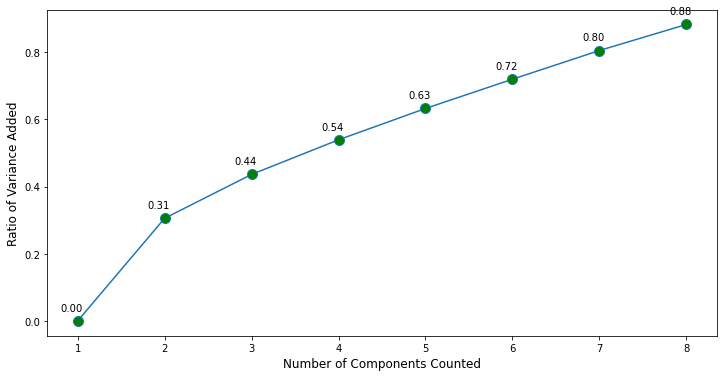

In [13]:
fig = plt.figure(figsize = (12,6))
add = fig.add_subplot(111)

#Plot the ratio ratio data
plt.plot(range(1,9), variable_ratio, marker = 'o', markerfacecolor = 'green', markersize = 10)
#Loop through range annotating with 2decimal point
for i, j in zip(range(1,9), variable_ratio):
    add.annotate('{:.2f}' .format(j), xy = (i-.2,j+.03))
    
plt.xlabel('Number of Components Counted', size = 12)
plt.ylabel('Ratio of Variance Added', size = 12)



***
## <center>__Heatmap for Principal Component Analysis__

Next we put the scaled data into the heap map to see if we could see the correlation of the components more definitly. This heatmap basically represent the correlation between the various feature and the principal component itself.
However, against our expectation for example 3 components of ward placed or 2 components of hearlards and ward place had a highter ratio. This was due to the splatter data sets in correlation to some data sets. 

<AxesSubplot:>

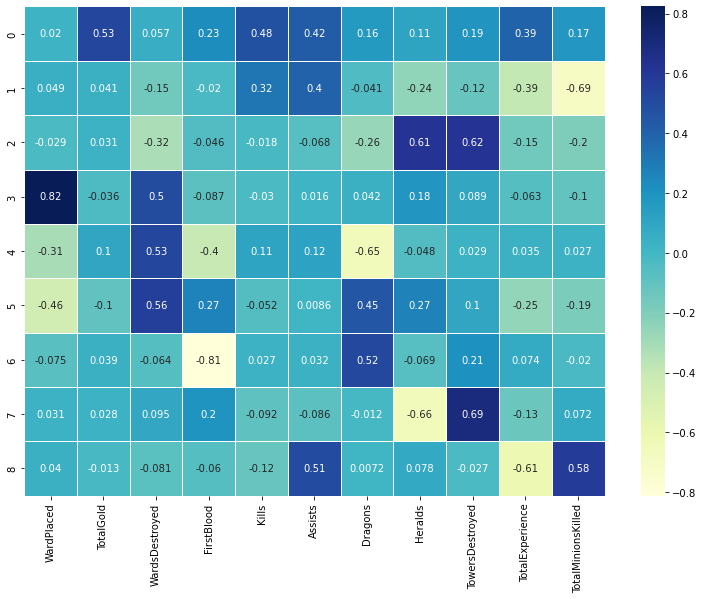

In [14]:
principal = PCA(n_components = 9)
principal.fit(scaled_data)
data_pca = principal.transform(scaled_data)

# Using principal components store it as data frame removing win column
pca_corr = pd.DataFrame(principal.components_, 
                        columns = lol_data_tidy.drop(['Win'], axis = 1).columns)

# Print out the heap amp
plt.figure(figsize = (13,9))
sns.heatmap(pca_corr, cmap = "YlGnBu", annot = True, lw = .5)



***
# <center>__Prediction using linear regression__

In [15]:
# Initialize the variables to be used in later steps
min, max = 10, 0
win_ratio1, win_ratio2, win_ratio3, win_ratio4, win_ratio5, win_ratio6, win_ratio7, win_ratio8, win_ratio9, win_ratio10 = 0,0,0,0,0,0,0,0,0,0
win1, win2, win3, win4, win5, win6, win7, win8, win9, win10 = 0,0,0,0,0,0,0,0,0,0
lose1, lose2, lose3, lose4, lose5, lose6, lose7, lose8, lose9, lose10 = 0,0,0,0,0,0,0,0,0,0

# Get maximum and minimum value for the number of kills for all games
for index, row in lol_data_tidy.iterrows():
    if row["Kills"] < min:
        min = row["Kills"]
    if row["Kills"] > max:
        max = row["Kills"]

# We subtract 3 from the max value because the last two groups will only contain 7 values out of 9879 values if we don't
max -= 3

# Gather win and lose information for each kill variable in the data frame; this loop will divide the data set by 10 groups and each if
# statement will set a range for each group. They will be used in later steps for predicting a win ratio depending on the number of kills.
for index, row in lol_data_tidy.iterrows():
     # group1 from 0% to 10% of the total kills
    if min <= row["Kills"] <= (min+(max-min)*(1/10)):
        if row["Win"] == 1:
            win1 += 1
        else:
            lose1 += 1
    # group2 from 20% to 30% of the total kills
    elif (min+(max-min)*(1/10)) <= row["Kills"] <= (min+(max-min)*2/10):
        if row["Win"] == 1:
            win2 += 1
        else:
            lose2 += 1
    # group3 from 30% to 40% of the total kills
    elif (min+(max-min)*(2/10)) <= row["Kills"] <= (min+(max-min)*(3/10)):
        if row["Win"] == 1:
            win3 += 1
        else:
            lose3 += 1
    # group4 from 40% to 50% of the total kills
    elif (min+(max-min)*(3/10)) <= row["Kills"] <= (min+(max-min)*(4/10)):
        if row["Win"] == 1:
            win4 += 1
        else:
            lose4 += 1
    # group5 from 50% to 60% of the total kills
    elif (min+(max-min)*(4/10)) <= row["Kills"] <= (min+(max-min)*(5/10)):
        if row["Win"] == 1:
            win5 += 1
        else:
            lose5 += 1
    # group6 from 60% to 70% of the total kills
    elif (min+(max-min)*(5/10)) <= row["Kills"] <= (min+(max-min)*(6/10)):
        if row["Win"] == 1:
            win6 += 1
        else:
            lose6 += 1
    # group7 from 70% to 80% of the total kills
    elif (min+(max-min)*(6/10)) <= row["Kills"] <= (min+(max-min)*(7/10)):
        if row["Win"] == 1:
            win7 += 1
        else:
            lose7 += 1
    # group8 from 80% to 90% of the total kills
    elif (min+(max-min)*(7/10)) <= row["Kills"] <= (min+(max-min)*(8/10)):
        if row["Win"] == 1:
            win8 += 1
        else:
            lose8 += 1
    # group9 from 80% to 90% of the total kills
    elif (min+(max-min)*(8/10)) <= row["Kills"] <= (min+(max-min)*(9/10)):
        if row["Win"] == 1:
            win9 += 1
        else:
            lose9 += 1
    # group10 from 90% to 100% of the total kills
    elif (min+(max-min)*(9/10)) <= row["Kills"] <= max:
        if row["Win"] == 1:
            win10 += 1
        else:
            lose10 += 1

# Evaluate the win ratio using the stored information about wins and loses.
win_ratio1 = win1/(win1+lose1)*100
win_ratio2 = win2/(win2+lose2)*100
win_ratio3 = win3/(win3+lose3)*100
win_ratio4 = win4/(win4+lose4)*100
win_ratio5 = win5/(win5+lose5)*100
win_ratio6 = win6/(win6+lose6)*100
win_ratio7 = win7/(win7+lose7)*100
win_ratio8 = win8/(win8+lose8)*100
win_ratio9 = win9/(win9+lose9)*100
win_ratio10 = win10/(win10+lose10)*100

print(win_ratio1,win_ratio2,win_ratio3,win_ratio4,win_ratio5,win_ratio6,win_ratio7,win_ratio8,win_ratio9,win_ratio10)


18.351063829787233 26.474442988204455 41.51929260450161 53.170731707317074 63.773357444243516 72.31833910034602 84.33048433048434 84.31372549019608 97.67441860465115 100.0


Here, this long code is necessary to evaluate win ratios depending on the number of kills for every game. Because our dataset represents information about the outcomes of each game as 1 or 0 (win or lose), it is appropriate to transform them into suitable win ratio values that will be more easily used in later steps for predicting the win ratio. It is done by first setting the maximum and minimum values to set the range of the kill values, and then dividing that range by ten to create ten groups each representing the win ratio on different kill values; this step is done by a single for loop and multiples of if statements. At the end of the code above, win ratios for each group is evaluated from the previously gathered pieces of information about the number of kills. These will then be used in the next part for the Linear Regression model. 

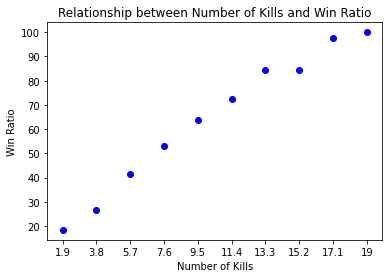

In [16]:
import matplotlib.pyplot as plt

# Set x and y values for plotting
x = ["1.9", "3.8", "5.7", "7.6", "9.5", "11.4", "13.3", "15.2", "17.1", "19"]
y = [win_ratio1,win_ratio2,win_ratio3,win_ratio4,win_ratio5,win_ratio6,win_ratio7,win_ratio8, win_ratio9, win_ratio10]

# Create a data frame 
data = [[1.9, win_ratio1], [3.8, win_ratio2], [5.7, win_ratio3], [7.6, win_ratio4], [9.5, win_ratio5], [11.4, win_ratio6], [13.3, win_ratio7],
        [15.2, win_ratio8], [17.1, win_ratio9], [19, win_ratio10]]
df = pd.DataFrame(data,columns = ['kills', 'win_ratio'])
#print(df)

# Plot the result on a graph
plt.scatter(x,y, c = "blue")
plt.xlabel("Number of Kills")
plt.ylabel("Win Ratio")
plt.title("Relationship between Number of Kills and Win Ratio")
plt.show()



The code above is a preparation for the Linear Regression model that will be formed below. Using the evaluated win ratio values in the previous step, we set x values as the number of kills and y values as the win ratios. After plotting them on a graph, we can clearly see that win ratios and the number of kills are strongly related to each other.

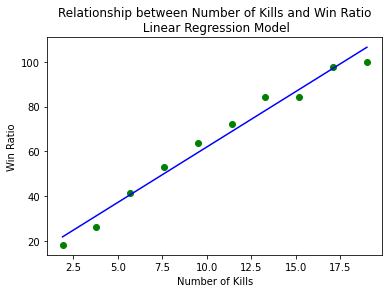

In [17]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()

# Set X train and Y target values
X = [[X] for X in df['kills'].values]
Y = [[Y] for Y in df['win_ratio'].values]

# Fitting for the Linear Regression model
regression_model_fit = lrm.fit(X, Y)
Y_predicted = lrm.predict(X)

# Plot the result on a graph
plt.scatter(X, Y, color = "green")
plt.plot(X, Y_predicted, color = "blue")
plt.xlabel("Number of Kills")
plt.ylabel("Win Ratio")
plt.title("Relationship between Number of Kills and Win Ratio\n Linear Regression Model")
plt.show()


After setting the X and y target values, we were able to fit the data into a Linear Regression model by importing the LinearRegression module that is already implemented. We then created a graph to show the Linear Regression model after fitting the data. The final result graph obviously seems to match with our hypothesis that greater numbers of kills contribute to higher win ratios.


In [18]:
print(regression_model_fit.score(X, Y), regression_model_fit.coef_)


0.9776419714246807 [[4.94174373]]


The first number describes the regression score in accordance with our Linear Regression model, and the second number describes the regression coefficient which determines how much the win ratio would likely increase depending on the number of kills. With the high value of regression score and coefficient, we can conclude from our Linear Regression model that the relationship is accurate and true.


***
# <center> __Conclusion and Further Exploration__


If you are interested in League of Legends, there is much more data available to explore. In this tutorial we only focused on the North American region for data analysis. However, there are a number of regions all around the world. The regions each have their unique game play styles, and the different components correlation with the win rate varies. Also, League of Legends is a very large data game including numerous components that have effects on win rates. In our tutorial we have only discussed about 9 key components of them, but it is also possible to look for others and find a connection with the win rate.

As you can see, this game is quite complex, consisting of multiple factors, but perhaps this lesson provides some useful information for both new and veteran players. Even if you aren't interested in the game, much of what we cover here may be applied to other datasets because data science is all about cleansing datasets, preparing them for further analysis, and then plotting and explaining any applicable visualizations or models. Hopefully, you found this tutorial informative and enjoyable to explore! While ending up my time in CMSC320, it was gratifying to code and explore my results.


***

# <center>Additional Resources
If you have any questions about the packages, code, or concepts covered in this lesson, click on these links to see if they can help you.

- [More information on Linear Regression](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)
- [Heatmap Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [sklearn: Machine Learning tools for data analysis prediction](https://scikit-learn.org/stable/)
- [Pandas: Open source data analysis and manipulation tool](https://pandas.pydata.org/)
- [NumPy: the most important Python package for scientific computing.](https://numpy.org/)
- [Matplotlib is a Python package that allows you to create static, animated, and interactive visualizations.](https://matplotlib.org/)
- [Seaborn: a matplotlib-based Python data visualization package.](https://seaborn.pydata.org/)

